# Introduction to NLP in Python
## Quest 3: Creating your own fake news classifier

The rise of social media and the proliferation of digital news sources have made it easier than ever to spread misinformation and fake news. As a result, this prompts the need to be able to distinguish between real and fake news stories. Machine learning techniques offer a promising solution to this, by allowing us to classify news articles based on their content and other features.

In this quest, we explore the use of machine learning classification methods to classify news articles as either real or fake. We will analyse the text of the news articles based on the natural language processing (NLP) methods learnt in previous quests, and evaluate the performance of our classifier using a variety of metrics. 

**Do take note:** Lines that contain underscores are for you to fill in with your code! Do remove the underscores before running the cells.

##### Part 1: Data Preprocessing using NLP Techniques

In this first section, we will first perform some exploratory data analysis on the data provided, and preprocess the data.

1. Import the necesary libraries and methods. The libraries listed below are the basic data science libraries that you can use, but feel free to import other libraries that you feel will help you along this quest.

In [1]:
import pandas as pd
import numpy as np
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords

2. Read the dataset from the CSV file

In [2]:
df = pd.read_csv('fake_news_train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


3. After loading the dataset, perform some primary exploratory data analysis to understand the dataset provided. You can use simple pandas methods and attributes such as `head()`, `shape` and `info()`.

In [3]:
# Exploratory data analysis to familiarize yourself with the data
df.shape

(20800, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

4. Before proceeding, it is always a good measure to check if null values are present in the dataset or not. 

If there are null values in the DataFrame, use the `fillna` method to fill the null values with an empty string (i.e. "") Remember to specify the `axis=1` parameter to fill the missing values along the columns of the DataFrame. 

In [6]:
# Check for null values and if any, fill them with an empty string 
df.isnull().sum()
df.fillna('', inplace=True, axis=1)

In [7]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

5. For data preprocessing, we will focus on the 'text' column of the DataFrame, which contains the content of each news article. We will apply tokenization, the first text preprocessing method covered in Quest 1.

Since the dataset has over 20,000 rows of data, it might take a while for the tokenization to finish running, depending on your machine specifications.

In [8]:
# Define a function to tokenize the text given
def tokenize_text(text):
    return word_tokenize(text)

# Apply the tokenize_text function to the 'text' column of the DataFrame and create a new column 'tokenized_text'
df['tokenized_text'] = df['text'].apply(tokenize_text)

In [9]:
df.head()

,id,title,author,text,label,tokenized_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[House, Dem, Aide, :, We, Didn, ’, t, Even, Se..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[Ever, get, the, feeling, your, life, circles,..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[Why, the, Truth, Might, Get, You, Fired, Octo..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[Videos, 15, Civilians, Killed, In, Single, US..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,"[Print, An, Iranian, woman, has, been, sentenc..."


6. With our new column containing the tokens of the text, we will dive into the second preprocessing step, which is to remove the stop words from the tokens.

Create a list `stop_words` that contains the NLTK predefined stopwords. Recall that the stopwords module was imported in the first cell.

In [10]:
stop_words = set(stopwords.words('english'))

7. Define a function that removes stop words from a list of tokens. Take note that the NLTK predefined stopwords are in lowercase, while some of the tokens in your current DataFrame contain uppercase alphabets. 

Apply the method you have defined to the `tokenized_text` column. You can choose to create a new column for these tokens without stopwords, or replace the `tokenized_text` column entirely to only contain tokens without stopwords.

In [11]:
# Define a function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    tokens_without_stopwords = [i for i in tokens if i.lower() not in stop_words]     # replace and fill in underscores
    return tokens_without_stopwords

# Apply the remove_stopwords function to the 'tokenized_text' column
df['tokenized_text_without_stopwords'] = df['tokenized_text'].apply(remove_stopwords)

In [12]:
df['tokenized_text_without_stopwords']

0        [House, Dem, Aide, :, ’, Even, See, Comey, ’, ...
1        [Ever, get, feeling, life, circles, roundabout...
2        [Truth, Might, Get, Fired, October, 29, ,, 201...
3        [Videos, 15, Civilians, Killed, Single, US, Ai...
4        [Print, Iranian, woman, sentenced, six, years,...
                               ...                        
20795    [Rapper, T., I., unloaded, black, celebrities,...
20796    [Green, Bay, Packers, lost, Washington, Redski...
20797    [Macy, ’, today, grew, union, several, great, ...
20798    [NATO, ,, Russia, Hold, Parallel, Exercises, B...
20799    [David, Swanson, author, ,, activist, ,, journ...
Name: tokenized_text_without_stopwords, Length: 20800, dtype: object

In [13]:
df.head()

,id,title,author,text,label,tokenized_text,tokenized_text_without_stopwords
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[House, Dem, Aide, :, We, Didn, ’, t, Even, Se...","[House, Dem, Aide, :, ’, Even, See, Comey, ’, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[Ever, get, the, feeling, your, life, circles,...","[Ever, get, feeling, life, circles, roundabout..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[Why, the, Truth, Might, Get, You, Fired, Octo...","[Truth, Might, Get, Fired, October, 29, ,, 201..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[Videos, 15, Civilians, Killed, In, Single, US...","[Videos, 15, Civilians, Killed, Single, US, Ai..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,"[Print, An, Iranian, woman, has, been, sentenc...","[Print, Iranian, woman, sentenced, six, years,..."


##### Part 2: Separating the dataset and Vectorization

8. Before we proceed, we will separate the dataset into features and targets. This allows us to clearly define the inputs and outputs of our model. 

The features are the independent variables that we use to predict the target variable, which is the dependent variable we want to predict. In this case, we are using the text from the article to determine if the article is reliable or unreliable. Reliable articles are labelled '0' in the `label` column while unreliable articles are labelled '1'.

In [14]:
# Separate the data into features and targets
X_df = df['tokenized_text_without_stopwords']
y_df = df['label']

In [15]:
y_df

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: object

9. Analyse the `y_df` data. Notice that the data type appears to be a `str` or `object` data type. 

Recall that we are looking to have a binary output which should only include numerical values. To train the model, we need to convert the label column into a numerical one.

In [16]:
y_df = y_df.astype(int)

In [17]:
y_df

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int32

10. As machine learning models take in numerical values for their inputs, we have to convert our feature data into numerical format as well. This is where we can incorporate our vectorization skills covered in Quest 2!

Import the `TfidfVectorizer` and create a TfidfVectorizer object. Since the features we are working with are in tokens, we have to specify this in the parameter as the vectorizer takes in strings by default. 

We set the `tokenizer` parameter to a lambda function that simply returns each document as-is. We also set `lowercase=False` to ensure that the tokenization is not modified.

After this, fit and transform the vectorizer on the tokenized documents `x_df`. This produces the TFIDF matrix.

In [19]:
# Perform vectorization using the TFIDF Vectorizer and fit and transform the tokenized documents
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf = tfidf_vectorizer.fit_transform(X_df)

<20800x256709 sparse matrix of type '<class 'numpy.float64'>'
	with 6151799 stored elements in Compressed Sparse Row format>

##### Part 3: Training and testing the model

11. Excellent! For the last part of this quest, we will be making use of a `LogisticRegression` model to create our fake news classifier. Logistic Regression has been covered in previous campaigns, but if you are new to this, don't worry as it is a relatively simple model to pick up. You can find out more about the different methods and attributes of Logistic Regression [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We will split the data into a training set and a testing set to evaluate the performance of our Logistic Regression model. The training set is used to train the model, while the testing set is used to evaluate the model's performance on new data that is has not seen before. This helps us to determine how well the model will generalize to new data and avoid overfitting. 

This is important because the ultimate goal of a machine learning model is to make accurate predictions on new, real-world data. Without a testing set, we would have no way to evaluate the performance of our model on new data. 

Now with our TFIDF matrix and target data, we can split the data into testing and training sets using `train_test_split`. 

In [24]:
# Split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y_df, random_state=0)     # replace and fill in underscores     

12. Import the necessary modules and create a LogisticRegression object. Fit the model according to the X and y training data produced above. 

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)     # replace and fill in underscores

LogisticRegression()

13. Now that the model has been trained, obtain the predictions of the model using the test data set.

In [29]:
y_pred = logreg.predict(X_test)
pd.DataFrame(y_pred, columns=['Predics'])

,Predics
0,0
1,1
2,1
3,0
4,0
...,...
5195,1
5196,1
5197,0
5198,1


14. Now we need to evaluate how well the model did. Here, we use three evaluation metrics to assess the performance of our model. These are the metrics we will be working with:

+ **Accuracy**: Accuracy is the proportion of correct predictions made by the model out of all the predictions made. It is calculated as the ratio of the number of correct predictions to the total number of predictions.
+ **Precision**: Precision is the proportion of true positives out of all the positive predictions made by the model. It is calculated as the ratio of the number of true positives to the total number of positive predictions.
+ **Recall**: Recall is the proportion of true positives out of all the actual positive cases in the dataset. It is calculated as the ratio of the number of true positives to the total number of actual positive cases.

Import the following metrics and calculate the scores by comparing the test targets to the predicted targets of the test set. 

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In machine learning, multiple metrics for evaluation is typically used as a single metric may not provide a complete picture of the model's performance. Different metrics capture different aspects of model performance, and evaluating a model using multiple metrics helps to provide a better understanding of how well the model is performing.

For example, a model with high accuracy may have poor performance for a specific class, or may be overfitting the training data. In this case, we may need to look at other metrics, such as precision and recall, to better understand the model's performance. Similarly, a model with high precision may have low recall, indicating that it is good at identifying positive cases, but is missing some of the actual positive cases.

By using multiple metrics for evaluation, we can identify the strengths and weaknesses of the model to make informed decisions about how to improve its performance. It is important to choose evaluation metrics that are relevant to the data you are dealing with, and consider the trade-offs between different metrics.

15. Print out each of the scores for your model below.

In [31]:
print("The accuracy score is ", accuracy)
print("The precision score is ", precision)
print("The recall score is ", recall)

The accuracy score is  0.9651923076923077
The precision score is  0.9661982529434106
The recall score is  0.9650986342943855


In [33]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<Axes: >

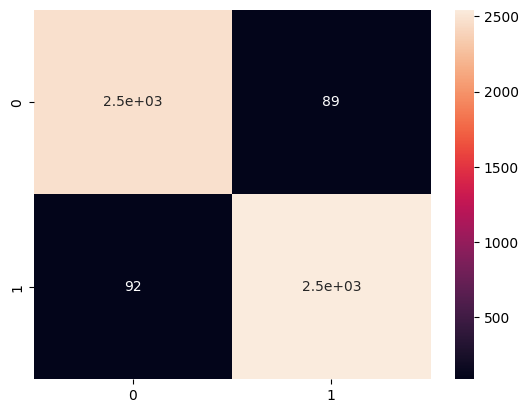

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2564
           1       0.97      0.97      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



Congratulations! You have made it to the end of the quest! Now you have learnt to use your various NLP skills in machine learning projects.

**Head back to the StackUp platform** to view the instructions for your submission.